# Urban Wildlife Analysis 



## Data Loading (Task A0)

In [1]:
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

# For inline plotting
%matplotlib inline

# Load CSV file using csv.reader()
csv_file_path = "Urban_wildlife.csv"

def load_csv_as_list(file_path):
    """Load CSV file into list using csv.reader()."""
    with open(file_path, 'r', encoding='utf-8') as file:
        csv_reader = csv.reader(file)
        header_row = next(csv_reader)
        data_rows = list(csv_reader)
    print(f"✓ Loaded {len(data_rows)} records with {len(header_row)} columns")
    return header_row, data_rows

header, rows_list = load_csv_as_list(csv_file_path)
print(f"Columns: {header[:5]}...")  # Show first 5 columns

✓ Loaded 5000 records with 34 columns
Columns: ['Date', 'City', 'Temperature', 'Humidity', 'AirQualityIndex']...


## Helper Functions for Task A

In [2]:
def find_column_index(header, column_name):
    """Find the index of a column by its name."""
    try:
        return header.index(column_name)
    except ValueError:
        return -1

## Task A1: Wildlife Sightings by City

In [3]:
def task_a1_wildlife_by_city(rows_list, header, city):
    """Task A1: Retrieve wildlife details for a specified city."""
    print(f"\n=== Task A1: Wildlife Sightings in {city} ===")
    
    # Find column indices
    city_idx = find_column_index(header, "City")
    species_idx = find_column_index(header, "WildlifeSpecies")
    category_idx = find_column_index(header, "SpeciesCategory")
    sightings_idx = find_column_index(header, "NumberOfSightings")
    endangered_idx = find_column_index(header, "IsEndangeredSpecies")
    
    # Filter rows by city
    results = []
    for row in rows_list:
        if len(row) > city_idx and row[city_idx].strip().lower() == city.strip().lower():
            results.append([
                row[species_idx],
                row[category_idx],
                row[sightings_idx],
                row[endangered_idx]
            ])
    
    # Display results
    if results:
        print(tabulate(results, 
                      headers=["WildlifeSpecies", "SpeciesCategory", "NumberOfSightings", "IsEndangeredSpecies"],
                      tablefmt="grid"))
        print(f"\nTotal records found: {len(results)}")
    else:
        print(f"No wildlife sightings found for city '{city}'.")

# Example execution
task_a1_wildlife_by_city(rows_list, header, "Peshawar")


=== Task A1: Wildlife Sightings in Peshawar ===
+-------------------+-------------------+---------------------+-----------------------+
| WildlifeSpecies   | SpeciesCategory   |   NumberOfSightings | IsEndangeredSpecies   |
+===================+===================+=====================+=======================+
| Wild Cat          | Mammal            |                   6 | Yes                   |
+-------------------+-------------------+---------------------+-----------------------+
| Owl               | Bird              |                   5 | Yes                   |
+-------------------+-------------------+---------------------+-----------------------+
| Porcupine         | Mammal            |                   7 | Yes                   |
+-------------------+-------------------+---------------------+-----------------------+
| Fox               | Mammal            |                   7 | No                    |
+-------------------+-------------------+---------------------+--------

## Task A2: Environmental Context

In [4]:
def task_a2_environmental_context(rows_list, header, time_of_day, aqi_threshold):
    """Task A2: Retrieve environmental context based on time and AQI."""
    print(f"\n=== Task A2: Environmental Context ({time_of_day}, AQI < {aqi_threshold}) ===")
    
    # Find column indices
    time_idx = find_column_index(header, "TimeOfDay")
    aqi_idx = find_column_index(header, "AirQualityIndex")
    temp_idx = find_column_index(header, "Temperature")
    humidity_idx = find_column_index(header, "Humidity")
    weather_idx = find_column_index(header, "WeatherCondition")
    
    # Filter rows
    results = []
    for row in rows_list:
        if len(row) > max(time_idx, aqi_idx):
            try:
                row_time = row[time_idx].strip()
                row_aqi = float(row[aqi_idx])
                
                if row_time.lower() == time_of_day.strip().lower() and row_aqi < aqi_threshold:
                    results.append([
                        row[temp_idx],
                        row[humidity_idx],
                        row[aqi_idx],
                        row[weather_idx]
                    ])
            except (ValueError, IndexError):
                continue
    
    # Display results
    if results:
        print(tabulate(results,
                      headers=["Temperature", "Humidity", "AirQualityIndex", "WeatherCondition"],
                      tablefmt="grid"))
        print(f"\nTotal records found: {len(results)}")
    else:
        print(f"No records found matching criteria.")

# Example execution
task_a2_environmental_context(rows_list, header, "Morning", 268)


=== Task A2: Environmental Context (Morning, AQI < 268) ===
+---------------+------------+-------------------+--------------------+
|   Temperature |   Humidity |   AirQualityIndex | WeatherCondition   |
+===============+============+===================+====================+
|          42.7 |       26.2 |               264 | Foggy              |
+---------------+------------+-------------------+--------------------+
|          33.1 |       57.8 |                78 | Cloudy             |
+---------------+------------+-------------------+--------------------+
|          26.8 |       79.1 |               116 | Sunny              |
+---------------+------------+-------------------+--------------------+
|          34.8 |       39.6 |                65 | Sunny              |
+---------------+------------+-------------------+--------------------+
|          29.7 |       53.1 |                82 | Cloudy             |
+---------------+------------+-------------------+--------------------+
|  

## Task A3: Human Impact Indicators

In [5]:
def task_a3_human_impact(rows_list, header, min_urban_dev_index, min_proximity_to_water):
    """Task A3: Retrieve human impact indicators based on thresholds."""
    print(f"\n=== Task A3: Human Impact Indicators ===")
    print(f"Filters: Urban Dev >= {min_urban_dev_index}, Proximity to Water >= {min_proximity_to_water}")
    
    # Find column indices
    urban_dev_idx = find_column_index(header, "UrbanDevelopmentIndex")
    proximity_idx = find_column_index(header, "ProximityToWaterSource")
    activity_idx = find_column_index(header, "HumanActivityLevel")
    noise_idx = find_column_index(header, "NoiseLevel_dB")
    light_idx = find_column_index(header, "LightPollutionLevel")
    garbage_idx = find_column_index(header, "GarbageManagementScore")
    
    # Filter rows
    results = []
    for row in rows_list:
        if len(row) > max(urban_dev_idx, proximity_idx):
            try:
                urban_dev = float(row[urban_dev_idx])
                proximity = float(row[proximity_idx])
                
                if urban_dev >= min_urban_dev_index and proximity >= min_proximity_to_water:
                    results.append([
                        row[activity_idx],
                        row[noise_idx],
                        row[light_idx],
                        row[garbage_idx]
                    ])
            except (ValueError, IndexError):
                continue
    
    # Display results
    if results:
        print(tabulate(results,
                      headers=["HumanActivityLevel", "NoiseLevel_dB", "LightPollutionLevel", "Garbage Score"],
                      tablefmt="grid"))
        print(f"\nTotal records found: {len(results)}")
    else:
        print(f"No records found matching criteria.")

# Example execution
task_a3_human_impact(rows_list, header, 0.8, 0.5)


=== Task A3: Human Impact Indicators ===
Filters: Urban Dev >= 0.8, Proximity to Water >= 0.5
+----------------------+-----------------+-----------------------+-----------------+
|   HumanActivityLevel |   NoiseLevel_dB |   LightPollutionLevel |   Garbage Score |
+======================+=================+=======================+=================+
|                    4 |              69 |                  0.5  |            0.93 |
+----------------------+-----------------+-----------------------+-----------------+
|                    1 |              63 |                  0.21 |            0.65 |
+----------------------+-----------------+-----------------------+-----------------+
|                    0 |              53 |                  0.89 |            0.95 |
+----------------------+-----------------+-----------------------+-----------------+
|                    6 |              44 |                  0.97 |            0.38 |
+----------------------+-----------------+-------------

## Task A4: Custom Filter (Duration & Season) - UNIQUE TO PROJECT 1

In [6]:
def task_a4_custom_duration_season(rows_list, header, min_duration, season):
    """Task A4 (Custom): Filter by sighting duration and season."""
    print(f"\n=== Task A4: Custom Filter (Duration > {min_duration} min, Season = {season}) ===")
    
    # Find column indices
    species_idx = find_column_index(header, "WildlifeSpecies")
    sightings_idx = find_column_index(header, "NumberOfSightings")
    duration_idx = find_column_index(header, "SightingDuration_Min")
    season_idx = find_column_index(header, "Season")
    
    # Filter rows
    results = []
    for row in rows_list:
        if len(row) > max(duration_idx, season_idx):
            try:
                duration = float(row[duration_idx])
                row_season = row[season_idx].strip()
                
                if duration > min_duration and row_season.lower() == season.strip().lower():
                    results.append([
                        row[species_idx],
                        row[sightings_idx],
                        row[duration_idx],
                        row[season_idx]
                    ])
            except (ValueError, IndexError):
                continue
    
    # Display results
    if results:
        print(tabulate(results,
                      headers=["WildlifeSpecies", "NumberOfSightings", "SightingDuration_Min", "Season"],
                      tablefmt="grid"))
        print(f"\nTotal records found: {len(results)}")
    else:
        print(f"No records found matching criteria.")

# Example execution
task_a4_custom_duration_season(rows_list, header, 10, "Summer")


=== Task A4: Custom Filter (Duration > 10 min, Season = Summer) ===
+-------------------+---------------------+------------------------+----------+
| WildlifeSpecies   |   NumberOfSightings |   SightingDuration_Min | Season   |
+===================+=====================+========================+==========+
| Wild Cat          |                   4 |                   46.7 | Summer   |
+-------------------+---------------------+------------------------+----------+
| Hedgehog          |                   5 |                   59.2 | Summer   |
+-------------------+---------------------+------------------------+----------+
| Owl               |                   7 |                   20.2 | Summer   |
+-------------------+---------------------+------------------------+----------+
| Wild Cat          |                   6 |                   53.1 | Summer   |
+-------------------+---------------------+------------------------+----------+
| Porcupine         |                   3 |        

## Load DataFrame for Tasks B and C

In [7]:
# Load DataFrame using pandas
df = pd.read_csv(csv_file_path)
print(f"✓ DataFrame loaded: {len(df)} rows, {len(df.columns)} columns")
df.head()

✓ DataFrame loaded: 5000 rows, 34 columns


,Date,City,Temperature,Humidity,AirQualityIndex,NoiseLevel_dB,HumanActivityLevel,NearbyGreenSpaces,RoadDensity,WildlifeSpecies,...,CitizenReportReliability,SightingDuration_Min,InteractionType,AnimalBehavior,IsEndangeredSpecies,DistanceFromCityCenter_km,ResidentialAreaType,NoiseToleranceLevel,VegetationDensity,ObservationMethod
0,11-02-16,Karachi,26.2,86.6,156,47,4,1,2,Fox,...,0.94,1.0,Fed,Fleeing,Yes,49.6,Urban,0.62,0.65,App
1,04-10-23,Lahore,15.2,21.6,268,98,9,3,2,Porcupine,...,0.95,58.0,Fed,Curious,Yes,40.4,Urban,0.30,0.19,In-person
2,18-11-16,Islamabad,35.5,50.8,248,83,7,2,0,Wild Cat,...,0.97,46.7,Chased,Calm,No,47.0,Semi-urban,0.89,0.64,Website
3,02-06-25,Karachi,42.7,26.2,264,99,8,4,1,Hedgehog,...,0.17,59.2,Fed,Aggressive,Yes,38.6,Urban,0.20,0.10,Hotline
4,19-09-15,Islamabad,39.5,69.5,212,74,0,2,4,Owl,...,0.38,20.2,Heard,Curious,No,36.5,Urban,0.64,0.90,Website


## Task B1: Top Species in Green Zones

In [8]:
def task_b1_top_species_green(df, green_threshold, season):
    """Task B1: Find top 3 species in green zones."""
    print(f"\n=== Task B1: Top 3 Species in Green Zones ===")
    print(f"Filters: Green Space > {green_threshold}, Season = {season}")
    
    # Filter data
    filtered_df = df[(df['NearbyGreenSpaces'] > green_threshold) & 
                     (df['Season'].str.lower() == season.lower())]
    
    if filtered_df.empty:
        print("No records found matching criteria.")
        return
    
    # Group by species and sum sightings
    species_sightings = filtered_df.groupby('WildlifeSpecies')['NumberOfSightings'].sum()
    top_3_species = species_sightings.nlargest(3)
    
    # Display results
    result_table = [[species, sightings] for species, sightings in top_3_species.items()]
    print(tabulate(result_table, 
                  headers=["WildlifeSpecies", "Total Sightings"],
                  tablefmt="grid"))
    print(f"\nTotal records analyzed: {len(filtered_df)}")

# Example execution
task_b1_top_species_green(df, 0.3, "Spring")


=== Task B1: Top 3 Species in Green Zones ===
Filters: Green Space > 0.3, Season = Spring
+-------------------+-------------------+
| WildlifeSpecies   |   Total Sightings |
+===================+===================+
| Wild Cat          |               652 |
+-------------------+-------------------+
| Owl               |               648 |
+-------------------+-------------------+
| Bat               |               628 |
+-------------------+-------------------+

Total records analyzed: 967


## Task B2: Environmental Influence by City

In [9]:
def task_b2_env_influence_by_city(df, city):
    """Task B2: Analyze environmental influence on sightings."""
    print(f"\n=== Task B2: Environmental Influence in {city} ===")
    
    # Filter by city
    city_df = df[df['City'].str.lower() == city.lower()]
    
    if city_df.empty:
        print(f"No records found for city '{city}'.")
        return
    
    # Group by WeatherCondition and TimeOfDay
    grouped = city_df.groupby(['WeatherCondition', 'TimeOfDay']).agg({
        'NumberOfSightings': 'mean',
        'SightingDuration_Min': 'mean'
    }).round(2)
    
    # Display results
    print("\nAverage Sightings and Duration by Weather & TimeOfDay:")
    print(grouped.to_string())
    print(f"\nTotal records analyzed: {len(city_df)}")

# Example execution
task_b2_env_influence_by_city(df, "Islamabad")


=== Task B2: Environmental Influence in Islamabad ===

Average Sightings and Duration by Weather & TimeOfDay:
                            NumberOfSightings  SightingDuration_Min
WeatherCondition TimeOfDay                                         
Cloudy           Afternoon               4.84                 32.65
                 Evening                 4.97                 32.77
                 Morning                 4.88                 34.07
                 Night                   5.25                 28.95
Foggy            Afternoon               4.59                 30.28
                 Evening                 4.32                 28.48
                 Morning                 5.02                 32.07
                 Night                   4.53                 22.22
Rainy            Afternoon               5.61                 31.70
                 Evening                 4.96                 31.90
                 Morning                 4.88                 28.57
     

## Task B3: Human-Wildlife Interaction Analysis

In [10]:
def task_b3_interaction_analysis(df, interaction_type):
    """Task B3: Analyze interaction patterns."""
    print(f"\n=== Task B3: Human-Wildlife Interaction Analysis ({interaction_type}) ===")
    
    # Filter by InteractionType
    interaction_df = df[df['InteractionType'].str.lower() == interaction_type.lower()]
    
    if interaction_df.empty:
        print(f"No records found for InteractionType '{interaction_type}'.")
        return
    
    # Calculate average duration
    avg_duration = interaction_df['SightingDuration_Min'].mean()
    print(f"\nAverage sighting duration for '{interaction_type}': {avg_duration:.2f} minutes")
    
    # Filter for durations greater than average
    longer_sightings = interaction_df[interaction_df['SightingDuration_Min'] > avg_duration]
    
    if longer_sightings.empty:
        print("No sightings with duration above average.")
        return
    
    # Group by ResidentialAreaType
    grouped = longer_sightings.groupby('ResidentialAreaType').agg({
        'NoiseLevel_dB': 'mean',
        'HumanActivityLevel': lambda x: x.value_counts().index[0] if len(x) > 0 else 'N/A',
        'LightPollutionLevel': 'mean'
    }).round(2)
    
    grouped.columns = ['Avg NoiseLevel_dB', 'Most Common Activity Level', 'Avg LightPollutionLevel']
    print(f"\nAnalysis for sightings with duration > {avg_duration:.2f} min:")
    print(grouped.to_string())
    print(f"\nRecords analyzed: {len(longer_sightings)}")

# Example execution
task_b3_interaction_analysis(df, "Chased")


=== Task B3: Human-Wildlife Interaction Analysis (Chased) ===

Average sighting duration for 'Chased': 30.95 minutes

Analysis for sightings with duration > 30.95 min:
                     Avg NoiseLevel_dB  Most Common Activity Level  Avg LightPollutionLevel
ResidentialAreaType                                                                        
Rural                            70.59                           8                     0.50
Semi-urban                       68.91                           8                     0.49
Urban                            70.82                           9                     0.49

Records analyzed: 505


## Task B4: Green Space vs Sightings (Endangered) - UNIQUE TO PROJECT 1

In [11]:
def task_b4_custom_endangered_correlation(df):
    """Task B4 (Custom): Analyze green space correlation for endangered species."""
    print(f"\n=== Task B4: Green Space vs Sightings (Endangered Species) ===")
    
    # Filter for endangered species
    endangered_df = df[df['IsEndangeredSpecies'].str.lower() == 'yes']
    
    if endangered_df.empty:
        print("No endangered species found in dataset.")
        return
    
    # Create bins for green space
    green_bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
    green_labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0']
    
    endangered_df = endangered_df.copy()
    endangered_df['Green_Space_Range'] = pd.cut(endangered_df['NearbyGreenSpaces'], 
                                                  bins=green_bins, 
                                                  labels=green_labels, 
                                                  include_lowest=True)
    
    # Group by green space range
    grouped = endangered_df.groupby('Green_Space_Range', observed=True).agg({
        'NumberOfSightings': 'mean',
        'WildlifeSpecies': 'count'
    }).round(2)
    
    grouped.columns = ['Avg NumberOfSightings', 'Count of Observations']
    
    print("\nCorrelation Analysis (Green Space Ranges):")
    print(grouped.to_string())
    print(f"\nTotal endangered species records: {len(endangered_df)}")
    
    # Calculate correlation coefficient
    correlation = endangered_df['NearbyGreenSpaces'].corr(endangered_df['NumberOfSightings'])
    print(f"\nPearson Correlation Coefficient: {correlation:.4f}")

# Example execution
task_b4_custom_endangered_correlation(df)


=== Task B4: Green Space vs Sightings (Endangered Species) ===

Correlation Analysis (Green Space Ranges):
                   Avg NumberOfSightings  Count of Observations
Green_Space_Range                                              
0-0.2                               4.75                    468
0.8-1.0                             5.04                    483

Total endangered species records: 2507

Pearson Correlation Coefficient: 0.0330


## Task C1: Temperature & Humidity by City


=== Task C1: Temperature & Humidity by City (Summer) ===


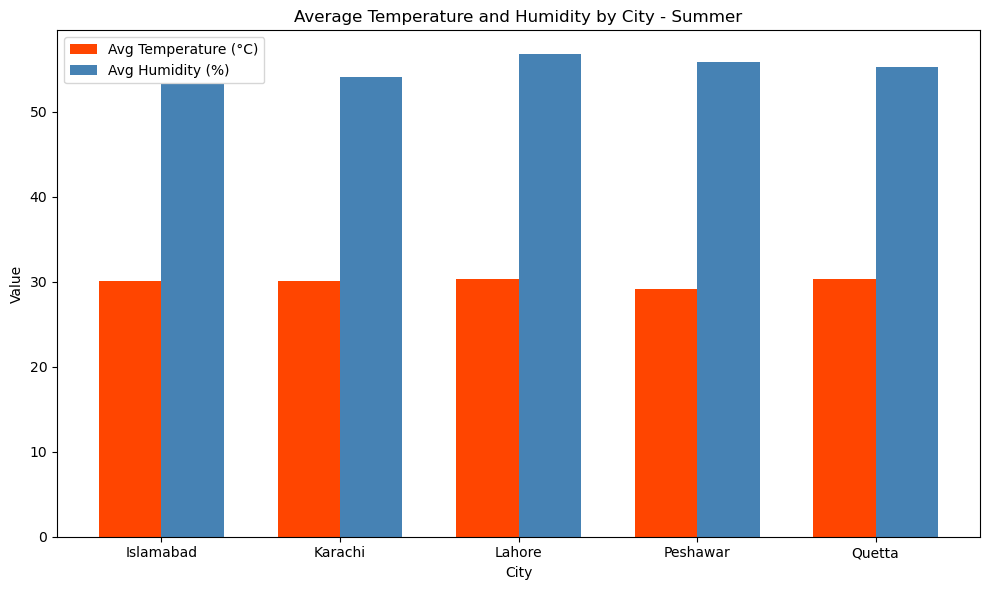

✓ Chart displayed


In [12]:
def task_c1_temp_humidity_by_city(df, season):
    """Task C1: Grouped bar chart of temperature and humidity."""
    print(f"\n=== Task C1: Temperature & Humidity by City ({season}) ===")
    
    # Filter by season
    season_df = df[df['Season'].str.lower() == season.lower()]
    
    if season_df.empty:
        print(f"No data found for season '{season}'.")
        return
    
    # Group by city
    city_stats = season_df.groupby('City').agg({
        'Temperature': 'mean',
        'Humidity': 'mean'
    }).round(2)
    
    # Plot
    cities = city_stats.index.tolist()
    avg_temp = city_stats['Temperature'].tolist()
    avg_humidity = city_stats['Humidity'].tolist()
    
    x_pos = np.arange(len(cities))
    width = 0.35
    
    plt.figure(figsize=(10, 6))
    plt.bar(x_pos - width/2, avg_temp, width, label='Avg Temperature (°C)', color='orangered')
    plt.bar(x_pos + width/2, avg_humidity, width, label='Avg Humidity (%)', color='steelblue')
    
    plt.xlabel('City')
    plt.ylabel('Value')
    plt.title(f'Average Temperature and Humidity by City - {season}')
    plt.xticks(x_pos, cities)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    print("✓ Chart displayed")

# Example execution
task_c1_temp_humidity_by_city(df, "Summer")

## Task C2: SpeciesCategory Trends


=== Task C2: SpeciesCategory Trends in Quetta ===


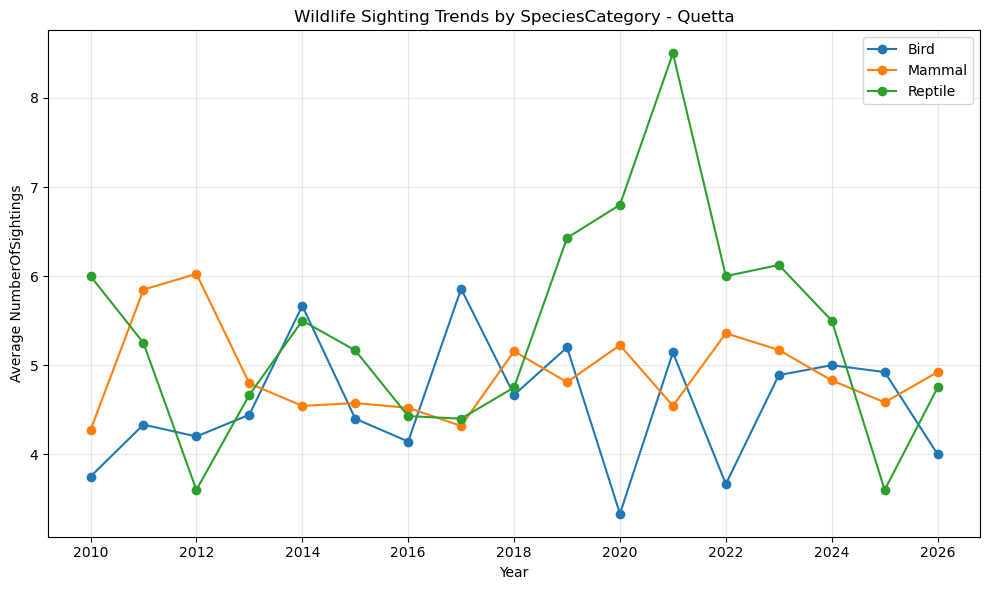

✓ Chart displayed


In [13]:
def task_c2_species_trends(df, city):
    """Task C2: Line chart of species trends over years."""
    print(f"\n=== Task C2: SpeciesCategory Trends in {city} ===")
    
    # Filter by city
    city_df = df[df['City'].str.lower() == city.lower()]
    
    if city_df.empty:
        print(f"No data found for city '{city}'.")
        return
    
    # Extract year from Date column if not already present
    if 'Year' not in city_df.columns:
        # Convert Date to datetime and extract year
        city_df = city_df.copy()
        city_df['Year'] = pd.to_datetime(city_df['Date'], format='%d-%m-%y').dt.year
    
    # Group by year and SpeciesCategory
    trends = city_df.groupby(['Year', 'SpeciesCategory'])['NumberOfSightings'].mean().unstack(fill_value=0)
    
    # Plot
    plt.figure(figsize=(10, 6))
    
    for category in trends.columns:
        plt.plot(trends.index, trends[category], marker='o', label=category)
    
    plt.xlabel('Year')
    plt.ylabel('Average NumberOfSightings')
    plt.title(f'Wildlife Sighting Trends by SpeciesCategory - {city}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("✓ Chart displayed")

# Example execution
task_c2_species_trends(df, "Quetta")

## Task C3: Public Awareness Distribution


=== Task C3: Public Awareness Distribution in Lahore ===


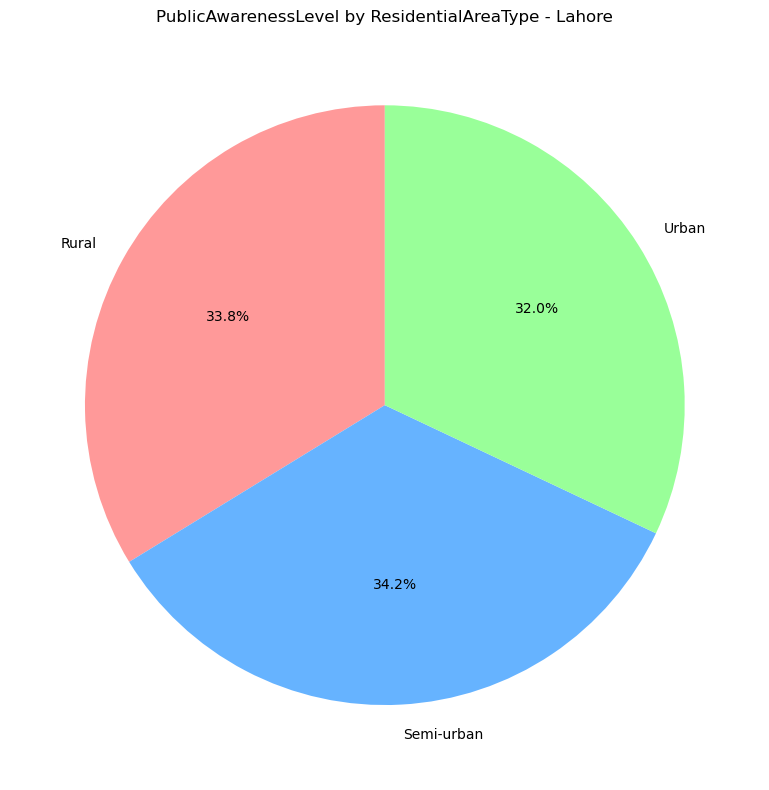

✓ Chart displayed


In [14]:
def task_c3_awareness_pie(df, city):
    """Task C3: Pie chart of public awareness distribution."""
    print(f"\n=== Task C3: Public Awareness Distribution in {city} ===")
    
    # Filter by city
    city_df = df[df['City'].str.lower() == city.lower()]
    
    if city_df.empty:
        print(f"No data found for city '{city}'.")
        return
    
    # Group by ResidentialAreaType
    awareness_by_area = city_df.groupby('ResidentialAreaType')['PublicAwarenessLevel'].mean()
    
    # Plot
    plt.figure(figsize=(8, 8))
    plt.pie(awareness_by_area.values, 
            labels=awareness_by_area.index, 
            autopct='%1.1f%%',
            startangle=90,
            colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
    
    plt.title(f'PublicAwarenessLevel by ResidentialAreaType - {city}')
    plt.tight_layout()
    plt.show()
    
    print("✓ Chart displayed")

# Example execution
task_c3_awareness_pie(df, "Lahore")

## Task C4: Noise vs Sightings (Endangered) - UNIQUE TO PROJECT 1


=== Task C4: Noise Level vs Sightings (Endangered Species) ===


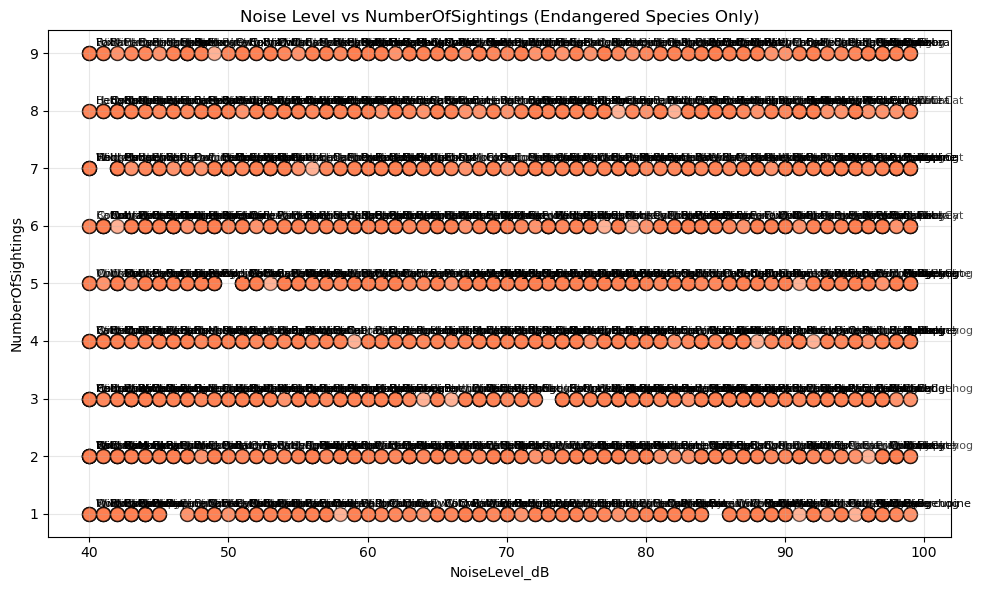

✓ Chart displayed
Total endangered species records plotted: 2507


In [15]:
def task_c4_custom_noise_scatter(df):
    """Task C4 (Custom): Scatter plot of noise vs sightings for endangered species."""
    print(f"\n=== Task C4: Noise Level vs Sightings (Endangered Species) ===")
    
    # Filter for endangered species
    endangered_df = df[df['IsEndangeredSpecies'].str.lower() == 'yes']
    
    if endangered_df.empty:
        print("No endangered species found in dataset.")
        return
    
    # Extract data
    noise_levels = endangered_df['NoiseLevel_dB']
    sightings = endangered_df['NumberOfSightings']
    species_names = endangered_df['WildlifeSpecies']
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(noise_levels, sightings, alpha=0.6, s=100, color='coral', edgecolors='black')
    
    # Add labels
    for i, species in enumerate(species_names):
        plt.annotate(species, (noise_levels.iloc[i], sightings.iloc[i]), 
                    fontsize=8, alpha=0.7, xytext=(5, 5), textcoords='offset points')
    
    plt.xlabel('NoiseLevel_dB')
    plt.ylabel('NumberOfSightings')
    plt.title('Noise Level vs NumberOfSightings (Endangered Species Only)')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"✓ Chart displayed")
    print(f"Total endangered species records plotted: {len(endangered_df)}")

# Example execution
task_c4_custom_noise_scatter(df)

## Interactive Menu System

In [ ]:
def main_menu():
    """Nested interactive menu with sub-menus for each Task category."""
    while True:
        # --- MAIN MENU ---
        print("\n" + "█"*50)
        print(f"█{'URBAN WILDLIFE ANALYSIS - MAIN MENU':^48}█")
        print("█"*50)
        print("  [1] TASK A: CSV Retrieval & Filtering")
        print("  [2] TASK B: Pandas Analysis")
        print("  [3] TASK C: Visualizations")
        print("  " + "-"*46)
        print("  [0] EXIT PROGRAM")
        print("█"*50)
        
        main_choice = input("\nSelect Category >> ").strip()

        # ==========================================
        # TASK A SUB-MENU
        # ==========================================
        if main_choice == '1':
            while True:
                print("\n" + "─"*40)
                print("📂 TASK A: CSV DATA RETRIEVAL")
                print("─"*40)
                print("  1. A1 - Wildlife by City")
                print("  2. A2 - Environmental Context")
                print("  3. A3 - Human Impact")
                print("  4. A4 - Duration & Season (Custom)")
                print("  0. << BACK TO MAIN MENU")
                print("─"*40)
                
                sub_choice = input("Task A Selection >> ").strip()

                if sub_choice == '0':
                    break # Breaks this inner loop, returns to Main Menu
                
                elif sub_choice == '1':
                    city = input("   >> Enter city: ")
                    task_a1_wildlife_by_city(rows_list, header, city)
                elif sub_choice == '2':
                    time = input("   >> Enter TimeOfDay: ")
                    aqi = float(input("   >> Enter AQI threshold: "))
                    task_a2_environmental_context(rows_list, header, time, aqi)
                elif sub_choice == '3':
                    urban = float(input("   >> Enter min urban dev: "))
                    water = float(input("   >> Enter min proximity to water: "))
                    task_a3_human_impact(rows_list, header, urban, water)
                elif sub_choice == '4':
                    dur = float(input("   >> Enter min duration: "))
                    season = input("   >> Enter season: ")
                    task_a4_custom_duration_season(rows_list, header, dur, season)
                else:
                    print("   [!] Invalid selection.")

        # ==========================================
        # TASK B SUB-MENU
        # ==========================================
        elif main_choice == '2':
            while True:
                print("\n" + "─"*40)
                print("📊 TASK B: PANDAS ANALYSIS")
                print("─"*40)
                print("  1. B1 - Top Species (Green Zones)")
                print("  2. B2 - Environmental Influence")
                print("  3. B3 - Interaction Analysis")
                print("  4. B4 - Endangered Correlation (Custom)")
                print("  0. << BACK TO MAIN MENU")
                print("─"*40)

                sub_choice = input("Task B Selection >> ").strip()

                if sub_choice == '0':
                    break
                
                elif sub_choice == '1':
                    green = float(input("   >> Enter green space threshold: "))
                    season = input("   >> Enter season: ")
                    task_b1_top_species_green(df, green, season)
                elif sub_choice == '2':
                    city = input("   >> Enter city: ")
                    task_b2_env_influence_by_city(df, city)
                elif sub_choice == '3':
                    interaction = input("   >> Enter InteractionType: ")
                    task_b3_interaction_analysis(df, interaction)
                elif sub_choice == '4':
                    task_b4_custom_endangered_correlation(df)
                else:
                    print("   [!] Invalid selection.")

        # ==========================================
        # TASK C SUB-MENU
        # ==========================================
        elif main_choice == '3':
            while True:
                print("\n" + "─"*40)
                print("📈 TASK C: VISUALIZATION")
                print("─"*40)
                print("  1. C1 - Temp & Humidity Chart")
                print("  2. C2 - Species Trends")
                print("  3. C3 - Awareness Pie Chart")
                print("  4. C4 - Noise Scatter (Custom)")
                print("  0. << BACK TO MAIN MENU")
                print("─"*40)

                sub_choice = input("Task C Selection >> ").strip()

                if sub_choice == '0':
                    break
                
                elif sub_choice == '1':
                    season = input("   >> Enter season: ")
                    task_c1_temp_humidity_by_city(df, season)
                elif sub_choice == '2':
                    city = input("   >> Enter city: ")
                    task_c2_species_trends(df, city)
                elif sub_choice == '3':
                    city = input("   >> Enter city: ")
                    task_c3_awareness_pie(df, city)
                elif sub_choice == '4':
                    task_c4_custom_noise_scatter(df)
                else:
                    print("   [!] Invalid selection.")

        # ==========================================
        # EXIT LOGIC
        # ==========================================
        elif main_choice == '0':
            print("Exiting System... Goodbye!")
            break
        
        else:
            print("Invalid Main Menu choice. Please try again.")

# Run menu
main_menu()


██████████████████████████████████████████████████
█      URBAN WILDLIFE ANALYSIS - MAIN MENU       █
██████████████████████████████████████████████████
  [1] TASK A: CSV Retrieval & Filtering
  [2] TASK B: Pandas Analysis
  [3] TASK C: Visualizations
  ----------------------------------------------
  [0] EXIT PROGRAM
██████████████████████████████████████████████████



Select Category >>  1



────────────────────────────────────────
📂 TASK A: CSV DATA RETRIEVAL
────────────────────────────────────────
  1. A1 - Wildlife by City
  2. A2 - Environmental Context
  3. A3 - Human Impact
  4. A4 - Duration & Season (Custom)
  0. << BACK TO MAIN MENU
────────────────────────────────────────


Task A Selection >>  1
   >> Enter city:  Lahore



=== Task A1: Wildlife Sightings in Lahore ===
+-------------------+-------------------+---------------------+-----------------------+
| WildlifeSpecies   | SpeciesCategory   |   NumberOfSightings | IsEndangeredSpecies   |
+===================+===================+=====================+=======================+
| Porcupine         | Mammal            |                   7 | Yes                   |
+-------------------+-------------------+---------------------+-----------------------+
| Wild Cat          | Mammal            |                   3 | Yes                   |
+-------------------+-------------------+---------------------+-----------------------+
| Owl               | Bird              |                   6 | Yes                   |
+-------------------+-------------------+---------------------+-----------------------+
| Owl               | Bird              |                   6 | No                    |
+-------------------+-------------------+---------------------+----------

Task A Selection >>  1
   >> Enter city:  2



=== Task A1: Wildlife Sightings in 2 ===
No wildlife sightings found for city '2'.

────────────────────────────────────────
📂 TASK A: CSV DATA RETRIEVAL
────────────────────────────────────────
  1. A1 - Wildlife by City
  2. A2 - Environmental Context
  3. A3 - Human Impact
  4. A4 - Duration & Season (Custom)
  0. << BACK TO MAIN MENU
────────────────────────────────────────


Task A Selection >>  1
   >> Enter city:  Lahore



=== Task A1: Wildlife Sightings in Lahore ===
+-------------------+-------------------+---------------------+-----------------------+
| WildlifeSpecies   | SpeciesCategory   |   NumberOfSightings | IsEndangeredSpecies   |
+===================+===================+=====================+=======================+
| Porcupine         | Mammal            |                   7 | Yes                   |
+-------------------+-------------------+---------------------+-----------------------+
| Wild Cat          | Mammal            |                   3 | Yes                   |
+-------------------+-------------------+---------------------+-----------------------+
| Owl               | Bird              |                   6 | Yes                   |
+-------------------+-------------------+---------------------+-----------------------+
| Owl               | Bird              |                   6 | No                    |
+-------------------+-------------------+---------------------+----------

Task A Selection >>  2
   >> Enter TimeOfDay:  Morning
   >> Enter AQI threshold:  0



=== Task A2: Environmental Context (Morning, AQI < 0.0) ===
No records found matching criteria.

────────────────────────────────────────
📂 TASK A: CSV DATA RETRIEVAL
────────────────────────────────────────
  1. A1 - Wildlife by City
  2. A2 - Environmental Context
  3. A3 - Human Impact
  4. A4 - Duration & Season (Custom)
  0. << BACK TO MAIN MENU
────────────────────────────────────────


Task A Selection >>  2
